# Data Analysis

In [1]:
import pandas as pd

## PubMed all

In [2]:
# Pubmed Data without filtering, contains all articles
x = pd.read_csv('./Dataset/data_pubmed_all.csv')

In [3]:
# Dataframe
x.columns

Index(['pubmed_id', 'title', 'keywords', 'journal', 'abstract', 'conclusions',
       'methods', 'results', 'copyrights', 'doi', 'publication_date',
       'authors', 'AKE_pubmed_id', 'AKE_pubmed_title', 'AKE_abstract',
       'AKE_keywords', 'File_Name'],
      dtype='object')

In [4]:
# Number of unique journals
x['journal'].nunique()

8335

In [5]:
# Number of articles
x.shape[0]

830978

In [6]:
# Count the number of articles per journal
article_count_per_journal = x['journal'].value_counts()

In [7]:
article_count_per_journal.describe()

count     8335.000000
mean        99.697421
std        416.964437
min          1.000000
25%          2.000000
50%         10.000000
75%         49.000000
max      17236.000000
Name: journal, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import numpy as np

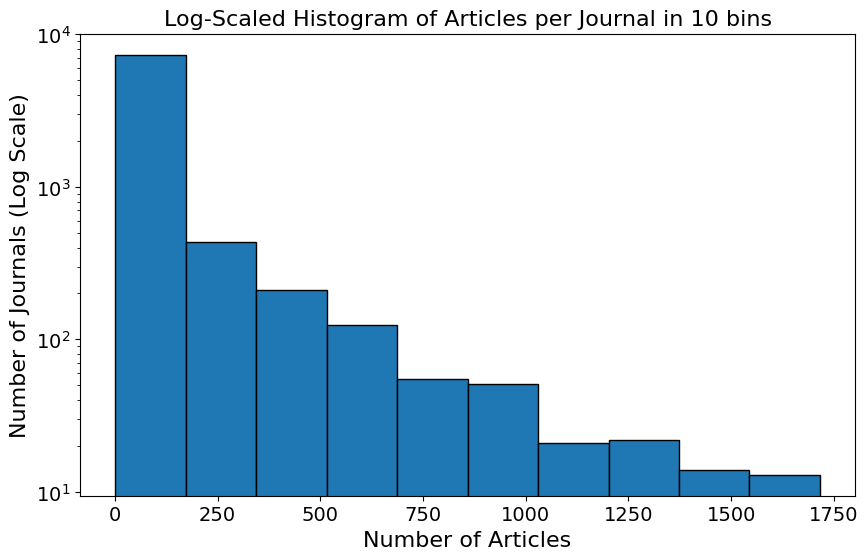

In [9]:
# Your existing histogram data preparation code
hist, bin_edges = np.histogram(article_count_per_journal, bins=10)
first_bin_range = (bin_edges[0], bin_edges[1])
articles_in_first_bin = article_count_per_journal[
    (article_count_per_journal >= first_bin_range[0]) & (article_count_per_journal <= first_bin_range[1])
]

# Set the global font size for all plots (optional)
plt.rcParams.update({'font.size': 18})  # You can adjust the size as needed

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(articles_in_first_bin, bins=10, edgecolor='black', log=True)

# Increase font size for title and labels
plt.title('Log-Scaled Histogram of Articles per Journal in 10 bins', fontsize=16)
plt.xlabel('Number of Articles', fontsize=16)
plt.ylabel('Number of Journals (Log Scale)', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(f'Histogram of Articles per Journal.pdf', format='pdf')
plt.show()


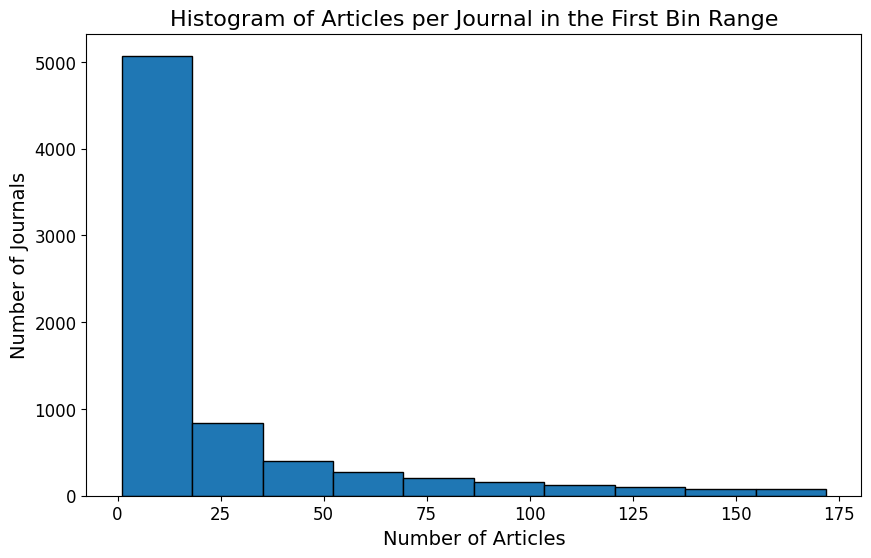

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for computing the histogram data
hist, bin_edges = np.histogram(articles_in_first_bin, bins=10)
second_bin_range = (bin_edges[0], bin_edges[1])
articles_in_second_bin = article_count_per_journal[
    (article_count_per_journal >= second_bin_range[0]) & (article_count_per_journal <= second_bin_range[1])
]

# Set the global font size for all plots (optional)
plt.rcParams.update({'font.size': 14})  # You can adjust the size as needed

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(articles_in_second_bin, bins=10, edgecolor='black')

# Increase font size for title and labels
plt.title('Histogram of Articles per Journal in the First Bin Range', fontsize=16)
plt.xlabel('Number of Articles', fontsize=14)
plt.ylabel('Number of Journals', fontsize=14)

# Increase font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(f'Histogram of Articles per Journal2.pdf', format='pdf')
plt.show()


## PubMed filtered

In [1]:
import pandas as pd

In [2]:
# Filtered PubMed Data, contains 
x = pd.read_csv('./Dataset/data_pubmed.csv')

In [3]:
# Dataframe
x.columns

Index(['publication_date', 'AKE_pubmed_id', 'AKE_pubmed_title', 'AKE_abstract',
       'AKE_keywords', 'journal'],
      dtype='object')

In [4]:
# Number of unique journals
x['journal'].nunique()

469

In [5]:
# Number of articles
x.shape[0]

262870

In [6]:
from transformers import AutoTokenizer

In [7]:
tokenizer = AutoTokenizer.from_pretrained('allenai/cs_roberta_base', do_lower_case=True)

In [8]:
import data_loader.CustomTokenize as ct

In [9]:
docs = ct.process_samples2(x)

In [10]:
docs = pd.DataFrame(docs, columns=['Input'])

In [11]:
docs['Input'][0]

'Laser Application to the Root Surface Increases the Bonding Strength of Surface-Treated Prefabricated Glass-Fiber Posts in Teeth with Excessive Substance Loss\nThis study examined the effect of roughening of the root surface using an erbium-doped yttrium aluminum garnet (Er: YAG) laser on the binding strength of teeth undergoing root canal treatment. Ninety single-rooted teeth were used and assigned randomly to 9 groups (n=10 each). Root canals were prepared using the FlexMaster rotary system. An Er: YAG laser was applied to the root canals in Group 1, with no surface treatment of the glass-fiber post. In Group 2, aluminum oxide particles were applied. In Group 3, the laser was applied to the root canals, with Cojet treatment. Group 4 received laser treatment and Clearfil Ceramic Primer. In Group 5, Clearfil Ceramic Primer silane coupling was performed on post surfaces without laser treatment. In Group 6, hydrofluoric acid (HF) application was followed by Clearfil Ceramic Primer cemen

In [12]:
# Define a function to calculate the token length
def get_token_length(text):
    tokens = tokenizer.tokenize(text)
    return len(tokens)

# Apply the function to a DataFrame column and create a new column for token lengths
docs['token_length'] = docs['Input'].apply(get_token_length)

# Calculate min, mean, and max token lengths
min_token_length = docs['token_length'].min()
mean_token_length = docs['token_length'].mean()
max_token_length = docs['token_length'].max()

# Print the results
print(f"Minimum Token Length: {min_token_length}")
print(f"Mean Token Length: {mean_token_length}")
print(f"Maximum Token Length: {max_token_length}")

Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors


Minimum Token Length: 21
Mean Token Length: 399.9529349107924
Maximum Token Length: 3448


In [13]:
import matplotlib.pyplot as plt

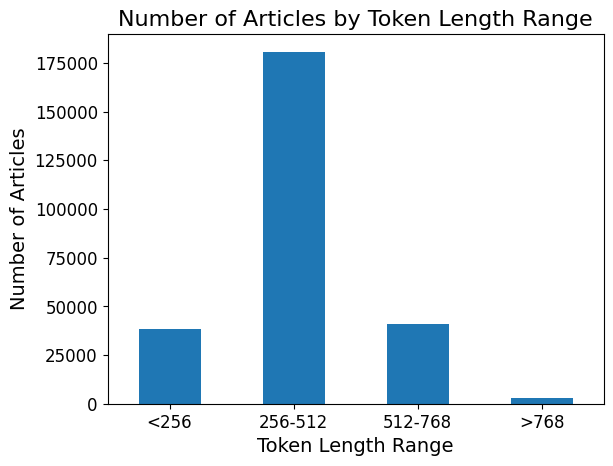

In [14]:
# Create bins for token length ranges
bins = [0, 256, 512, 768, float('inf')]  # You can adjust these bins as needed

# Use pd.cut to categorize token lengths into bins
category_labels = ['<256', '256-512', '512-768', '>768']
docs['token_length_category'] = pd.cut(docs['token_length'], bins=bins, labels=category_labels)

# Calculate the count of items in each category
category_counts = docs['token_length_category'].value_counts().reindex(category_labels, fill_value=0)

# Set the global font size for all plots (optional)
plt.rcParams.update({'font.size': 14})  # Adjust the size as needed

# Create a bar plot
category_counts.plot(kind='bar', rot=0)

# Increase font size for title and labels
plt.title('Number of Articles by Token Length Range', fontsize=16)
plt.xlabel('Token Length Range', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)

# Increase font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(f'Number of Articles by Token Length Range.pdf', format='pdf')
plt.show()

## PubMed Filtered Train

In [15]:
# Filtered PubMed Data, contains 
x = pd.read_csv('./Dataset/data_pubmed_train.csv')

In [16]:
# Dataframe
x.columns

Index(['publication_date', 'AKE_pubmed_id', 'AKE_pubmed_title', 'AKE_abstract',
       'AKE_keywords', 'journal'],
      dtype='object')

In [17]:
# Number of unique journals
x['journal'].nunique()

469

In [18]:
# Number of articles
x.shape[0]

157540

## PubMed Filtered Validation

In [19]:
# Filtered PubMed Data, contains 
x = pd.read_csv('./Dataset/data_pubmed_val.csv')

In [20]:
# Dataframe
x.columns

Index(['publication_date', 'AKE_pubmed_id', 'AKE_pubmed_title', 'AKE_abstract',
       'AKE_keywords', 'journal'],
      dtype='object')

In [21]:
# Number of unique journals
x['journal'].nunique()

469

In [22]:
# Number of articles
x.shape[0]

52571

## PubMed filtered Test

In [23]:
# Filtered PubMed Data, contains 
x = pd.read_csv('./Dataset/data_pubmed_test.csv')

In [24]:
# Dataframe
x.columns

Index(['publication_date', 'AKE_pubmed_id', 'AKE_pubmed_title', 'AKE_abstract',
       'AKE_keywords', 'journal'],
      dtype='object')

In [25]:
# Number of unique journals
x['journal'].nunique()

469

In [26]:
# Number of articles
x.shape[0]

52759

# Extract Labels

Extract labels to use later.

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [28]:
x = pd.read_csv('./Dataset/data_pubmed_test.csv')
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(x['journal'])

In [29]:
import joblib

# Save the label_encoder object
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

# Random Paper

In [30]:
import pandas as pd

In [31]:
x = pd.read_csv('./Dataset/data_pubmed_test.csv')

In [32]:
a = x[x['AKE_pubmed_title'] == 'Environment-dependent attack rates of cryptic and aposematic butterflies']

In [33]:
a.to_csv('RandomArticle.csv', index=False)

In [34]:
unique_journals = set(x['journal'])

# Convert the set back to a list if needed
unique_journals_list = list(unique_journals)

# Save the unique journal names to a file
with open('unique_journals.txt', 'w') as file:
    for journal in unique_journals_list:
        file.write(journal + '\n')

# Random Journal

In [35]:
import random

In [36]:
x = pd.read_csv('./Dataset/data_pubmed_test.csv')

In [37]:
# Get the list of journal entries
journal_entries = x['journal']

# Choose a random index
random_index = random.randint(0, len(journal_entries) - 1)

# Retrieve the random journal entry
random_journal = journal_entries[random_index]

# Print the random journal entry
print(random_journal)

Neural regeneration research


Search in https://pubmed.ncbi.nlm.nih.gov/